In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

In [4]:
df = pd.read_csv('C:/Users/fksob/OneDrive/CoderHouse - Data Science/LifeE.Coder.01/Source/Lifeexpectancydata.csv')


In [5]:
rename_columns = {
    'Country': 'País',
    'Year': 'Año',
    'Status': 'Estado de desarrollo',
    'Life expectancy ': 'Esperanza de vida',
    'Adult Mortality': 'Mortalidad adulta',
    'infant deaths': 'Muertes infantiles',
    'Alcohol': 'Alcohol',
    'percentage expenditure': 'Gasto porcentual',
    'Hepatitis B': 'Hepatitis B',
    'Measles ': 'Sarampión',
    ' BMI ': 'IMC',
    'under-five deaths ': 'Muertes menores de cinco años',
    'Polio': 'Polio',
    'Total expenditure': 'Gasto total',
    'Diphtheria ': 'Difteria',
    ' HIV/AIDS': 'VIH/SIDA',
    'GDP': 'PIBPC',
    'Population': 'Población',
    ' thinness  1-19 years': 'Delgadez 1-19 años',
    ' thinness 5-9 years': 'Delgadez 5-9 años',
    'Income composition of resources': 'Indice de desarrollo humano',
    'Schooling': 'Escolaridad'
}


In [6]:
df01 = df
dfrenamed = df01.rename(columns=rename_columns)
dfrenamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   País                           2938 non-null   object 
 1   Año                            2938 non-null   int64  
 2   Estado de desarrollo           2938 non-null   object 
 3   Esperanza de vida              2928 non-null   float64
 4   Mortalidad adulta              2928 non-null   float64
 5   Muertes infantiles             2938 non-null   int64  
 6   Alcohol                        2744 non-null   float64
 7   Gasto porcentual               2938 non-null   float64
 8   Hepatitis B                    2385 non-null   float64
 9   Sarampión                      2938 non-null   int64  
 10  IMC                            2904 non-null   float64
 11  Muertes menores de cinco años  2938 non-null   int64  
 12  Polio                          2919 non-null   f

In [7]:
dfrenamed['Infantiles'] = dfrenamed['Muertes infantiles'] > 0 

dfrenamed[['País','Año', 'Muertes infantiles', 'Infantiles']].head()

,País,Año,Muertes infantiles,Infantiles
0,Afghanistan,2015,62,True
1,Afghanistan,2014,64,True
2,Afghanistan,2013,66,True
3,Afghanistan,2012,69,True
4,Afghanistan,2011,71,True


In [8]:
dfrenamed['Adultas'] = dfrenamed['Mortalidad adulta'] > 0
dfrenamed[['País','Año','Mortalidad adulta', 'Adultas']]

,País,Año,Mortalidad adulta,Adultas
0,Afghanistan,2015,263.0,True
1,Afghanistan,2014,271.0,True
2,Afghanistan,2013,268.0,True
3,Afghanistan,2012,272.0,True
4,Afghanistan,2011,275.0,True
...,...,...,...,...
2933,Zimbabwe,2004,723.0,True
2934,Zimbabwe,2003,715.0,True
2935,Zimbabwe,2002,73.0,True
2936,Zimbabwe,2001,686.0,True


In [9]:
categorizacion = ['Hepatitis B', 'Sarampión', 'Polio', 'Difteria', 'VIH/SIDA']


def categorizar(valor, min_val, median_val, mean_val, max_val):
    if valor <= mean_val:
        return 'Baja Incidencia'
    elif mean_val < valor <= median_val:
        return 'Incidencia Media'
    elif median_val < valor <= max_val:
        return 'Alta Incidencia'
    else:
        return 'Incidencia Critica'
    
for categoria in categorizacion:
    min_val = dfrenamed[categoria].min()
    max_val = dfrenamed[categoria].max()
    mean_val = dfrenamed[categoria].mean()
    median_val = dfrenamed[categoria].median()

    dfrenamed[categoria + '_Categoria'] = dfrenamed[categoria].apply(categorizar, args=(min_val, median_val, mean_val, max_val))

dfrenamed[['País'] + [  categoria + '_Categoria' for categoria in categorizacion]].head()

,País,Hepatitis B_Categoria,Sarampión_Categoria,Polio_Categoria,Difteria_Categoria,VIH/SIDA_Categoria
0,Afghanistan,Baja Incidencia,Baja Incidencia,Baja Incidencia,Baja Incidencia,Baja Incidencia
1,Afghanistan,Baja Incidencia,Baja Incidencia,Baja Incidencia,Baja Incidencia,Baja Incidencia
2,Afghanistan,Baja Incidencia,Baja Incidencia,Baja Incidencia,Baja Incidencia,Baja Incidencia
3,Afghanistan,Baja Incidencia,Alta Incidencia,Baja Incidencia,Baja Incidencia,Baja Incidencia
4,Afghanistan,Baja Incidencia,Alta Incidencia,Baja Incidencia,Baja Incidencia,Baja Incidencia


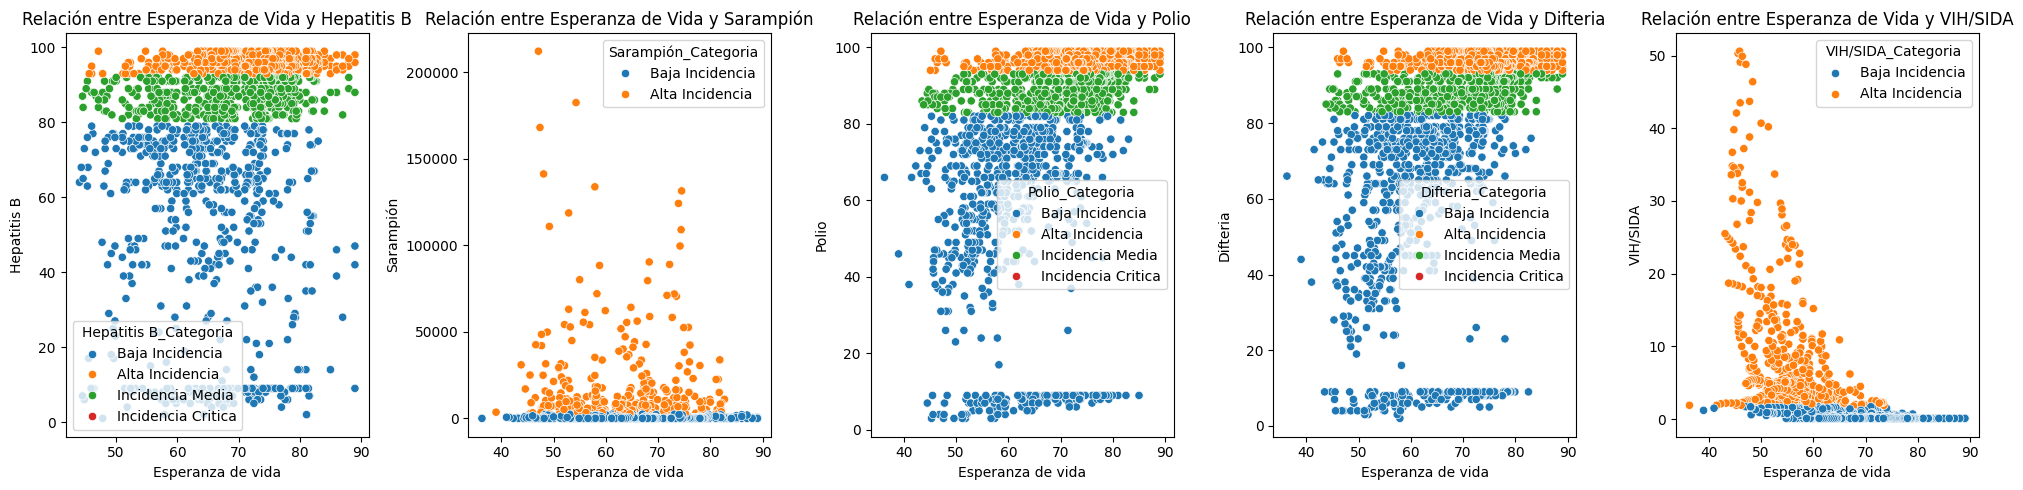

In [10]:

enfermedades = ['Hepatitis B', 'Sarampión', 'Polio', 'Difteria', 'VIH/SIDA']

fig, axes = plt.subplots(1, len(enfermedades), figsize=(20, 5))

for i, enfermedad in enumerate(enfermedades):
    sns.scatterplot(
        data= dfrenamed, 
        x= 'Esperanza de vida', 
        y= enfermedad, 
        hue= enfermedad + '_Categoria', 
        ax=axes[i]
    )
    axes[i].set_title(f'Relación entre Esperanza de Vida y {enfermedad}')
    axes[i].set_xlabel('Esperanza de vida')
    axes[i].set_ylabel(enfermedad)

plt.tight_layout()


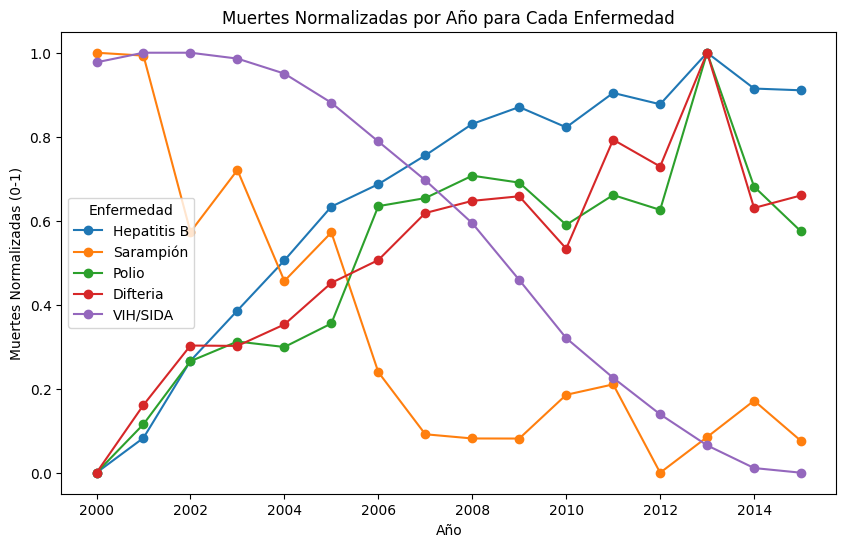

In [11]:

df_agrupado = dfrenamed.groupby('Año')[enfermedades].sum()

df_normalizado = df_agrupado.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

plt.figure(figsize=(10, 6))

for enfermedad in enfermedades:
    plt.plot(df_normalizado.index, df_normalizado[enfermedad], label=enfermedad, marker='o')

plt.xlabel('Año')
plt.ylabel('Muertes Normalizadas (0-1)')
plt.title('Muertes Normalizadas por Año para Cada Enfermedad')

plt.legend(title='Enfermedad')

plt.show()

In [13]:
latam = [
    'Argentina', 'Bolivia', 'Brasil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'República Dominicana',
    'Ecuador', 'El Salvador', 'Guatemala', 'Honduras', 'México', 'Nicaragua', 'Panamá', 'Paraguay',
    'Perú', 'Uruguay', 'Venezuela'
]

In [14]:
dfrenamed['Latam'] = dfrenamed['País'].isin(latam)

dfrenamed[['País','Latam']].head()

,País,Latam
0,Afghanistan,False
1,Afghanistan,False
2,Afghanistan,False
3,Afghanistan,False
4,Afghanistan,False


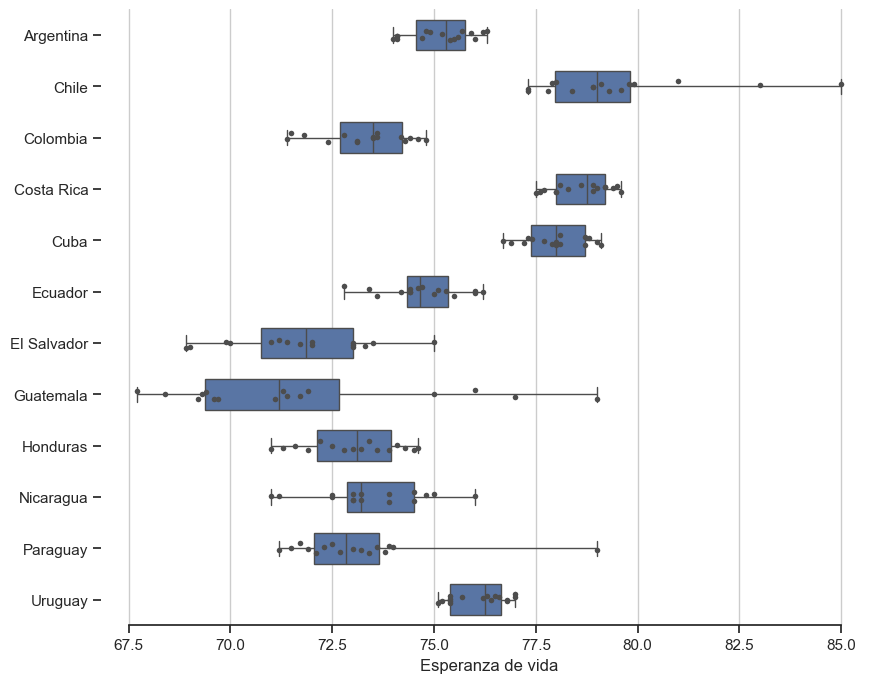

In [15]:
sns.set_theme(style='ticks')

f, ax = plt.subplots(figsize=(10,8))

dfplot = dfrenamed[dfrenamed['Latam'] == True]

sns.boxplot(
    dfplot, x = 'Esperanza de vida', y="País", whis=[0, 100], width=.6)

sns.stripplot(dfplot, x='Esperanza de vida', y='País', size=4, color='.3', linewidth=0)

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)


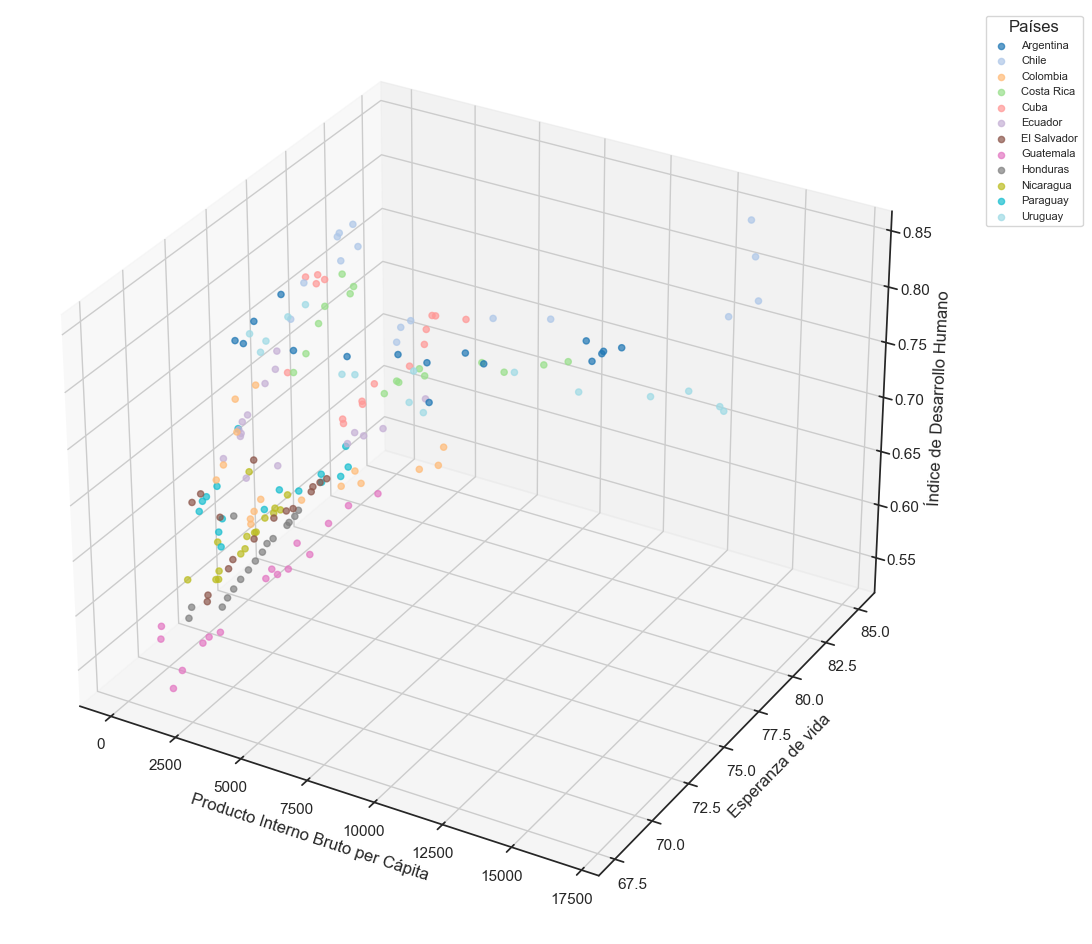

In [16]:

dffiltrado = dfrenamed[(dfrenamed['PIBPC'] > 0) & (dfrenamed['Latam']) & (dfrenamed[['PIBPC', 'Esperanza de vida','Indice de desarrollo humano']].notna().all(axis=1))]

unique_paises = dffiltrado['País'].unique()
colors = plt.get_cmap('tab20', len(unique_paises))

color_map = {pais: colors(i) for i, pais in enumerate(unique_paises)}

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

for pais in unique_paises:
    df_pais = dffiltrado[dffiltrado['País'] == pais]
    ax.scatter(df_pais['PIBPC'], df_pais['Esperanza de vida'], df_pais['Indice de desarrollo humano'],
               color=color_map[pais], label=pais, marker='o', alpha=0.7)

ax.set_xlabel('Producto Interno Bruto per Cápita')
ax.set_ylabel('Esperanza de vida')
ax.set_zlabel('Índice de Desarrollo Humano')

ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Países', fontsize=8)

plt.show()

In [ ]:

def clasificar_cobertura(valor):
    if valor >= 0 and valor < 25:
        return 'Cobertura mínima'
    elif valor >= 25 and valor < 50:
        return 'Cobertura baja'
    elif valor >= 50 and valor < 75:
        return 'Cobertura media'
    elif valor >= 75 and valor <= 100:
        return 'Cobertura alta'
    else:
        return 'Dato inválido'

dfrenamed['Cobertura_HepatitisB'] = dfrenamed['Hepatitis B'].apply(clasificar_cobertura)
dfrenamed['Cobertura_Polio'] = dfrenamed['Polio'].apply(clasificar_cobertura)
dfrenamed['Cobertura_Difteria'] = dfrenamed['Difteria'].apply(clasificar_cobertura)